In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
Xiris = iris.drop('species', axis=1)
Xiris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
yiris = iris['species']
yiris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = \
  train_test_split(Xiris, yiris, train_size=0.6, random_state=0)

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB()

In [8]:
ypred = model.predict(Xtest)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.9333333333333333

In [10]:
from sklearn.decomposition import PCA
pca   = PCA(n_components=2, random_state=0)
Xtrf  = pca.fit_transform(Xiris)

In [11]:
iris['PCA0']  = Xtrf[:,0]
iris['PCA1']  = Xtrf[:,1]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA0,PCA1
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


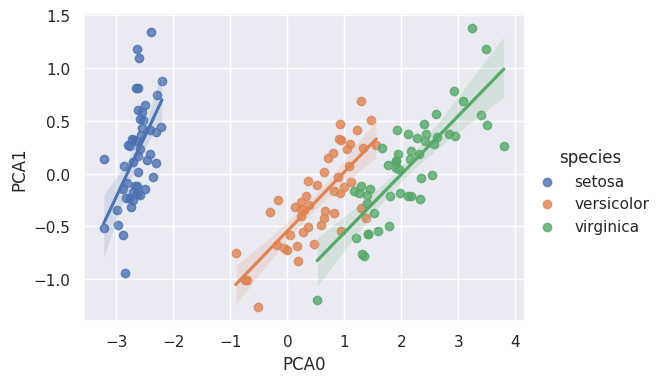

In [12]:
sns.lmplot(data=iris, x='PCA0', y='PCA1', hue='species', fit_reg=True,
           height=4, aspect=1.4)

In [13]:
from sklearn.mixture import GaussianMixture
gmm     = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
ypred   = gmm.fit_predict(Xiris)

In [14]:
iris['clusters'] = ypred
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA0,PCA1,clusters
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


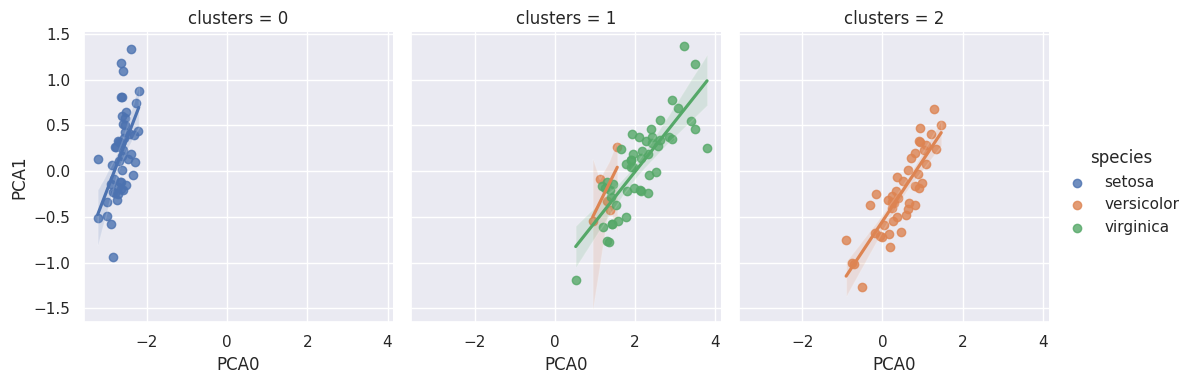

In [15]:
sns.lmplot(data=iris, x='PCA0', y='PCA1', hue='species', col='clusters', fit_reg=True,
           height=4, aspect=0.9)